In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
# importing the data set fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Looking at the shape and data type of the data set
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# creating a validating set and scaling the inputs between 0 and 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [5]:
# class names for fashion mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [6]:
# Creating a sequential model

# Sequential model is single stack of layers
model = keras.models.Sequential()
# Converts each row of input array to 1D, it computes X.reshape(-1, 1)
# Alternatively you could add keras.layers.InputLayer as the first layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Dense layer with 300 neurons. It also manages weight matrix for bias terms
model.add(keras.layers.Dense(300, activation='relu'))

model.add(keras.layers.Dense(100, activation='relu'))
# Output layer with 10 neurons for each class, uses softmax as classes are exclusive
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()
# None just means that batch size could be anything
# First layer has 300 x 784 + 300 learnable parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers
# Returns object references for the layers for the model

In [11]:
hidden1 = model.get_layer('dense')
# Returns the weights for the hidden layer
weights, biases = hidden1.get_weights()
weights.shape

# Kernel is another name for matrix of weights
# You can use kernel initializer to change the strategy for initializing weights
# kernel_initializer Or bias_initializer

(784, 300)

In [13]:
# Compile method lets you specify loss function and optimizer to use
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Sparse categorical crossentropy is used because there is only one target class index i.e. 8
# Categorical crossentropy would apply where y is one hot encoded vector i.e. [0., 0., 0., 0., 1., 0.]
# Binary crossentropy is used with binary classification problem

# Convert to one-hot encoded, we could use keras.utils.to_cateogrical()


In [14]:
# Training the model for 30 epochs
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# If some classes are over represented, it would be useful to set the class_weight argument when calling the fit method
# These weights would be used by keras when computing the loss
# If you want to set per instance weight, set the sample weight, it supercedes the class weight

# Fit method returns a history object

Epoch 1/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7269 - accuracy: 0.7619 - val_loss: 0.5265 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4936 - accuracy: 0.8294 - val_loss: 0.4603 - val_accuracy: 0.8448
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4461 - accuracy: 0.8437 - val_loss: 0.4232 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4177 - accuracy: 0.8540 - val_loss: 0.4013 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3975 - accuracy: 0.8607 - val_loss: 0.3904 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3806 - accuracy: 0.8659 - val_loss: 0.3985 - val_accuracy: 0.8578
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3686 - accuracy: 0.8691 - val_loss: 0.3896 - val_acc

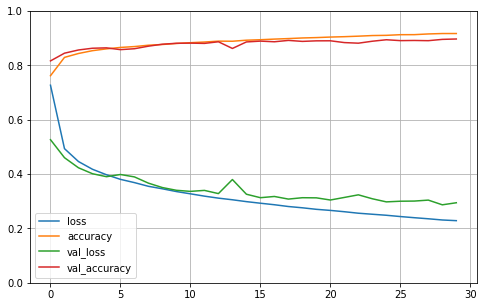

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Plotting history.history shows the learning curves

In [17]:
# Some things to try if you are not happy with the model
# Retuning the hyperparameters

# Learning rate, optimizer, number of layers, number of neurons, types of activations, batch size

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 71.6964 - accuracy: 0.8394


[71.69636535644531, 0.8393999934196472]

In [21]:
# Use first 3 instances for prediction
X_new = X_test[:3]

y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
import numpy as np
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

y_new = y_test[:3]
print(y_new)

# Model correctly predicts all 3 examples

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
